In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/apple/Downloads/deep/11_chrun_prediction/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3320,2195-VVRJF,Male,1,Yes,No,18,Yes,No,DSL,Yes,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),59.10,1011.05,No
1221,3055-MJDSB,Male,0,No,No,9,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.60,190.1,No
6020,0020-JDNXP,Female,0,Yes,Yes,34,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Mailed check,61.25,1993.2,No
6239,0665-XHDJU,Male,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Electronic check,99.40,7285.7,No
6181,4937-QPZPO,Male,0,Yes,Yes,61,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,99.90,6241.35,No


In [3]:
df.drop('customerID', inplace=True, axis=1) #delete the customerID from dataset.

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with this column



In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

#### TotalCharges is in string type so we have to convert into numerical

In [6]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

###### ValueError: Unable to parse string " " at position 488     "  " this is the error we get some values are not in numbers or they are in blank space

##### some values are not in numbers, lets identify those rows




In [7]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.shape

(7043, 20)

In [10]:
 df.iloc[4380].TotalCharges

' '

In [11]:
 df[df.TotalCharges!=' '].shape

(7032, 20)

#### remove rows with space

In [12]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [17]:
df1.TotalCharges.dtypes

dtype('float64')

In [18]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### succsusfully  coverting string value of TotalCharges into numerical values 

In [19]:
df1[df1.Churn=='No']   #tuner means how much custemer is loyal. and he is donot leaving 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


### visulatization

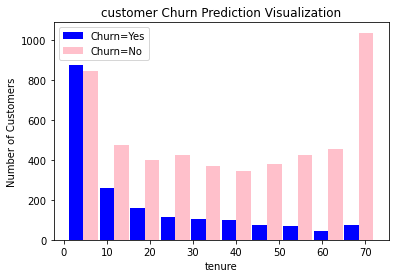

In [35]:
tenure_churn_no = df1[df1.Churn=='No'].tenure    # this for tenure No ,,, they are  not leaving
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure  # this for tenure yes  ,,, they are leaving

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('customer Churn Prediction Visualization')

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['blue','pink'],label=['Churn=Yes','Churn=No'])
plt.legend()

##### above graphs says , observe pink colur at 70 in x-axis ,more than 1000 members not leaving ,, graphs shows majority of the peopls not leaving 

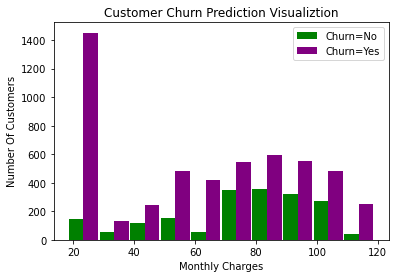

In [43]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges     # this for MonthlyCharges  No ,,, they are  not leaving     
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges   # this for MonthlyCharges  No ,,, they are  not leaving        

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")



plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','purple'],label=['Churn=No','Churn=Yes'])
plt.legend()

#### above graphs says ,, who all are having monthly charge high they are leaving,, see 120 in x_axis purple color shows they are leaving

In [45]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### above dataset having the unique values .. now we have to find out those unique values using for loop

In [47]:
for column in df:
    print(column)    #printing the column names

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [52]:
for column in df:
    print(df[column].unique()) ## it will print unique values

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [61]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')    ## it will print only object type unique values with column names
            
            
            

In [64]:
print_unique_col_values(df1) #it will print only object types only not a numerical type

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [67]:
df1.replace('No internet service','No', inplace=True)
df1.replace('No phone service','No', inplace=True)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [68]:
print_unique_col_values(df1)  # replacing the No internet service and No phone service as No

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


#### above we have yes and no ,, those can be converted into 1 and 0,, 
####   yes=1 , No= 0

In [75]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for column in yes_no_columns:
    df1[column].replace({'Yes': 1,'No': 0},inplace=True)

In [76]:
for column in df1:
    print(f'{column}: {df1[column].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


###### 'Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup' 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn'] converted into 0 and 1

In [79]:
df1['gender'].replace({'Female':1, 'Male':0},inplace=True)

In [81]:
df1.gender.unique()

array([1, 0])

#### one hot encoding covrting string to categorical

In [82]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [83]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5421,1,0,0,0,38,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3577,0,0,0,0,36,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
5802,1,0,0,0,42,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
73,0,0,1,1,62,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
662,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [84]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

### scale down the tenure ,MonthlyCharges, TotalCharges. 

In [88]:
columns_to_scale = ['tenure' ,'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])

In [95]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3355,1,0,1,0,0.943662,1,1,0,1,1,...,0,1,0,0,0,1,0,1,0,0
368,0,0,1,0,0.985915,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
352,1,1,0,0,0.084507,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [90]:
for column in df2:
    print(f'{column}:{df2[column].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

### upto here we completed the Data cleaning , scaling ,visulaization  

# train, test ,split

In [96]:
x = df2.drop('Churn', axis = 'columns') #for x train all the column except churn
y = df2['Churn']                        #for y test only churn

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 5)

In [99]:
x_train.shape

(5625, 26)

In [100]:
x_test.shape

(1407, 26)

In [102]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [103]:
len(x_train.columns)

26

### build a model using ANN

In [121]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)


Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.6223 - accuracy: 0.6878
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.5611 - accuracy: 0.7403
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.7403
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.7406
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.7760
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.7906
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.7986
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8020
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.7986
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4226 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8192
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8174
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8172
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8160
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.8188
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.8206
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8187
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8185
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8199
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 

In [122]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.7896


[0.44930675625801086, 0.7896233201026917]

In [131]:
yp = model.predict(x_test)
yp[0:10]

array([[0.23247886],
       [0.41028437],
       [0.00860474],
       [0.70728207],
       [0.55698997],
       [0.62661284],
       [0.10240513],
       [0.4423536 ],
       [0.22876617],
       [0.15192446]], dtype=float32)

In [132]:
y_prd = []

for element in yp:
    if(element>.5):
        y_prd.append(1)
    else:
        y_prd.append(0)
        

In [133]:
print(y_prd[0:10])

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]


In [135]:
y_test[0:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

### confusion matrix

In [158]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_prd))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       999
           1       0.69      0.50      0.58       408

    accuracy                           0.79      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Text(141.0, 0.5, 'Truth')

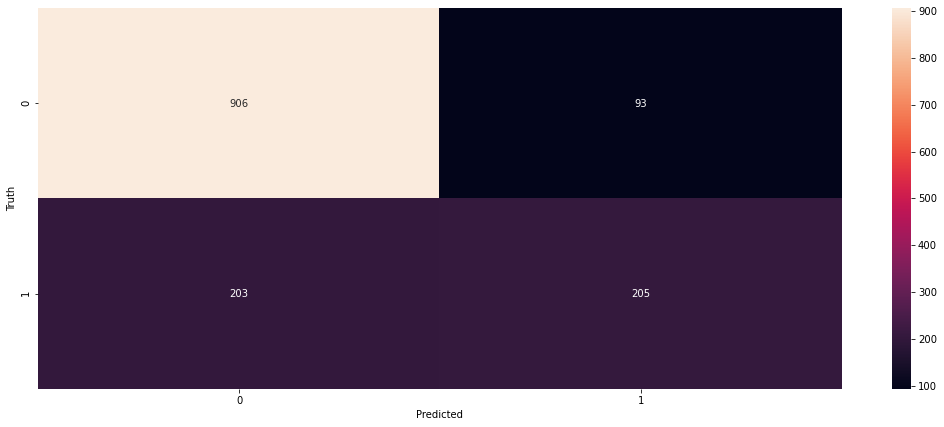

In [144]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prd)

plt.figure(figsize = (18,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [148]:
y_test.shape

(1407,)

#### Accuarcy

In [149]:
round((906+205)/(906+205+203+93),2)

0.79

#### Precision for 0 class. i.e. Precision for customers who did not churn

In [152]:
round((906)/(906+203),2)

0.82

#### Precision for 1 class. i.e. Precision for customers who actually churned

In [153]:
round((205)/(205+93),2)

0.69

### #Recall for 0 class

In [154]:
round((906)/(906+93),2)

0.91

#### Recall for  1 class 

In [157]:
round((205)/(205+203),2)

0.5